In [1]:
import pandas as pd

In [2]:
filename = 'yelp_academic_dataset_business.json' #business data from yelp which gives us a big pic of the data
with open(filename) as json_data:
    data = json_data.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
business = pd.read_json(data_json_str)

In [3]:
business_df = business[['business_id','name','review_count','categories', 'stars']] #select these columns for plotting

In [4]:
#categories column includs more than one catergory for the business. Choose the last one as the "category"
def clean_str(astring):
    return astring.strip(']').split(',')[-1][3:-1]
category = business_df['categories'].apply(str)
category = category.apply(clean_str)

In [5]:
business_df['categories'] = category

/Users/jingyan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

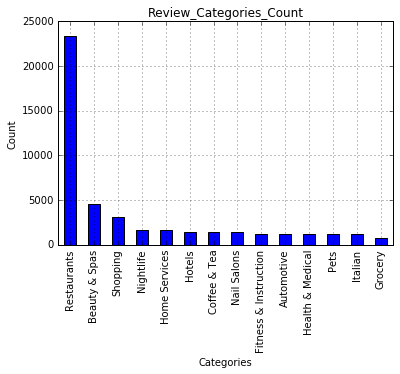

In [9]:
business_count = business_df['categories'].value_counts()
business_count = business_count[business_count >= 750]
fig = plt.figure()
business_count.plot(kind = 'bar', title = 'Review_Categories_Count' )
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()
fig.savefig('plot1_category.png', bbox_inches='tight')


In [20]:
#Majority of Reviews are about restaurants. So I will pick restaurant reviews as my subjects
restaurant_df = business_df[business_df['categories'] == 'Restaurants']
star_count = restaurant_df['stars'].value_counts(normalize = True)

In [21]:
star_count

3.5    0.264900
4.0    0.256110
3.0    0.174342
4.5    0.117486
2.5    0.100292
2.0    0.044250
5.0    0.020281
1.5    0.018223
1.0    0.004116
dtype: float64

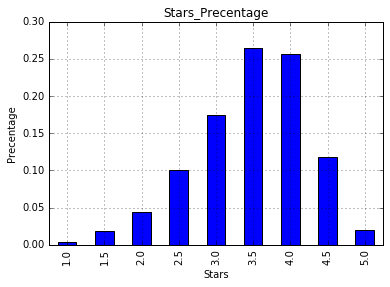

In [24]:
fig = plt.figure()
star_count.reindex([1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]).plot(kind = 'bar', title = 'Stars_Precentage')
plt.xlabel('Stars')
plt.ylabel('Precentage')
plt.show()
fig.savefig('plot2_stars.png', bbox_inches='tight')